In [1]:
import numpy as np

In [2]:
from scipy import linalg
import matplotlib.pyplot as plt

In [3]:
from timeit import default_timer as timer

In [88]:
TOLERANCE = 1.0e-10

In [5]:
def lu_solve(A, b):
    lu, piv = linalg.lu_factor(A)
    x = linalg.lu_solve((lu, piv), b)
    return x

In [84]:
def gs_solve(A, b, n_iter=10):
    nrows, ncols = A.shape
    x = np.zeros_like(b)
    x_new = np.zeros_like(b)

    if A.shape[0] != b.shape[0]:
        raise ValueError('A and b have different number of rows')

    for k in range(n_iter):
        for i in range(nrows):
            x_new[i] = b[i] / A[i, i]
            for j in range(nrows):
                if i != j:
                    x_new[i] = x_new[i] - ((A[i, j] / A[i, i]) * x[j])
                    x[i] = x_new[i]

    return x

In [103]:
def cg_solve(A, b, tol=TOLERANCE):
    EPSILON = 1.0e-10
    
    if np.trace(A)< 0:
        raise ValueError('A is not positive semi-definite!')
    
    nrows, ncols = A.shape
    
    x = np.zeros_like(b)
    r = b.copy()
    r_old = np.zeros_like(b)
    p = r.copy()
    Ap = np.zeros_like(b)
    
    for i in range(nrows):
        r_old = r
        Ap = A .dot(p)
        
        alpha = np.dot(r, r) / max(np.dot(p, Ap), EPSILON)
        x = x + alpha * p
        r = r - alpha * Ap
        
        if np.linalg.norm(r, 2) < tol:
            break
        
        beta = np.dot(r, r) / max(np.dot(r_old, r_old), EPSILON)
        p = r + beta * p
    
    return x

In [ ]:
def cg_solve_preconditioned(A, b, p, tol=NORM_R_TOLERANCE):
    pass    

In [110]:
def test_solvers(A, b):
    start = timer()
    x_lu = lu_solve(A, b)
    stop = timer()
    print(f'LU:\t\t{stop-start:.0e} s')
    start = timer()
    x_gs = gs_solve(A, b)
    stop = timer()
    print(f'GS:\t\t{stop-start:.0e} s')
    start = timer()
    x_cg = cg_solve(A, b)
    stop = timer()
    print(f'CG:\t\t{stop-start:.0e} s')
    return x_lu, x_gs, x_cg

## Example: 2 x 2, integer coefficients

In [81]:
A = np.array([[4, 1], [1, 3]], dtype=float)
b = np.array([1, 2], dtype=float)

In [111]:
x_lu, x_gs, x_cg = test_solvers(A, b)

LU:		3e-04 s
GS:		1e-04 s
CG:		2e-04 s


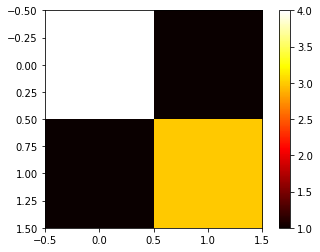

In [112]:
im = plt.imshow(A, cmap='hot')
plt.colorbar(im)

Text(0, 0.5, 'CG solution')

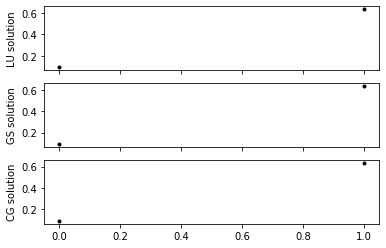

In [113]:
fig, ax = plt.subplots(3, 1)

idx = np.arange(len(x_lu))
ax[0].plot(idx, x_lu, 'k.')
ax[0].set_ylabel('LU solution')
ax[0].set_xticklabels([])

ax[1].plot(idx, x_gs, 'k.')
ax[1].set_ylabel('GS solution')
ax[1].set_xticklabels([])

ax[2].plot(idx, x_cg, 'k.')
ax[2].set_ylabel('CG solution')

## Example: 2 x 2, integer coefficients

## Example: spline matrix